In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
#Importing data
df = pd.read_csv('train.csv')
#Printing head
df.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [2]:
df.tail()


,ID,Datetime,Count
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580
18287,18287,25-09-2014 23:00,534


In [3]:
#Creating train and test set 
#Index 10392 marks the end of October 2013 

train=df[0:10392] 
test=df[10392:]

#Aggregating the dataset at daily level
df.Timestamp = pd.to_datetime(df.Datetime,format='%d-%m-%Y %H:%M') 

df.index = df.Timestamp 

df = df.resample('D').mean()

print df.size

train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 

train.index = train.Timestamp 

train = train.resample('D').mean() 

test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 

test.index = test.Timestamp 

test = test.resample('D').mean()

train.head(15)



1524


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:16: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  app.launch_new_instance()
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:22: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


,ID,Count
Datetime,,
2012-08-25,11.5,3.166667
2012-08-26,35.5,3.666667
2012-08-27,59.5,2.583333
2012-08-28,83.5,2.416667
2012-08-29,107.5,2.500000
2012-08-30,131.5,3.083333
2012-08-31,155.5,3.250000
2012-09-01,179.5,4.666667
2012-09-02,203.5,4.916667


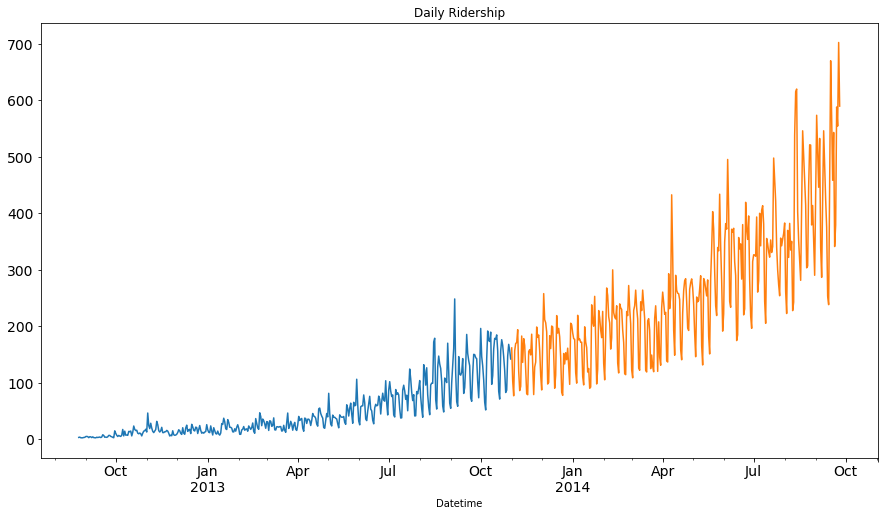

In [4]:
#Plotting data
train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
test.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
plt.show()

[  3.16666667   3.66666667   2.58333333   2.41666667   2.5
   3.08333333   3.25         4.66666667   4.91666667   4.5
   2.75         4.33333333   4.16666667   2.83333333   4.16666667
   2.83333333   2.66666667   2.41666667   3.5          3.
   3.5          3.83333333   2.91666667   3.83333333   7.83333333
   6.58333333   3.5          3.75         3.25         4.25
   6.75         6.66666667   4.91666667   4.33333333   3.25
   2.58333333  14.83333333  10.33333333   6.91666667   4.83333333
   6.66666667   5.58333333   4.91666667   7.          17.25
   5.83333333  14.25         7.16666667   7.41666667   6.83333333
  13.75        13.41666667  14.41666667   5.83333333  12.16666667
  23.33333333  17.33333333  15.33333333  15.91666667  10.66666667
   9.58333333  10.91666667   9.66666667   5.83333333  10.66666667
  14.25        14.91666667  17.58333333  12.66666667  46.33333333
  24.33333333  18.75        28.25        19.75        13.91666667
  11.66666667  14.5         17.16666667  31.583333

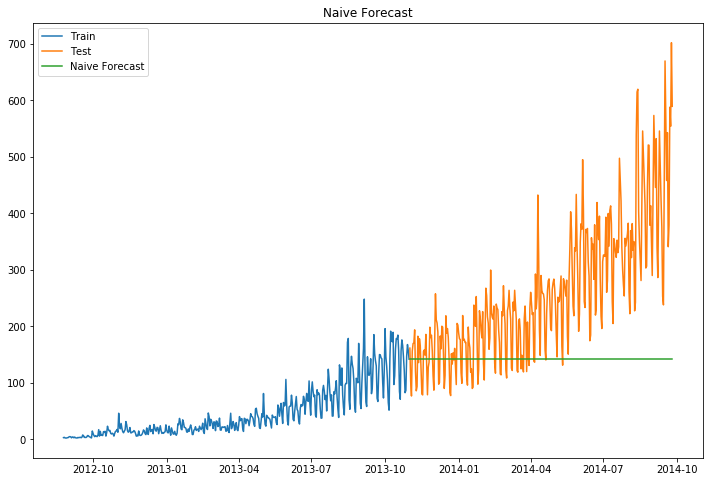

In [5]:
dd= np.asarray(train.Count)
print dd
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Count'], label='Train')
plt.plot(test.index,test['Count'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [10]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.Count, y_hat.naive))
print(rms)


168.100659828


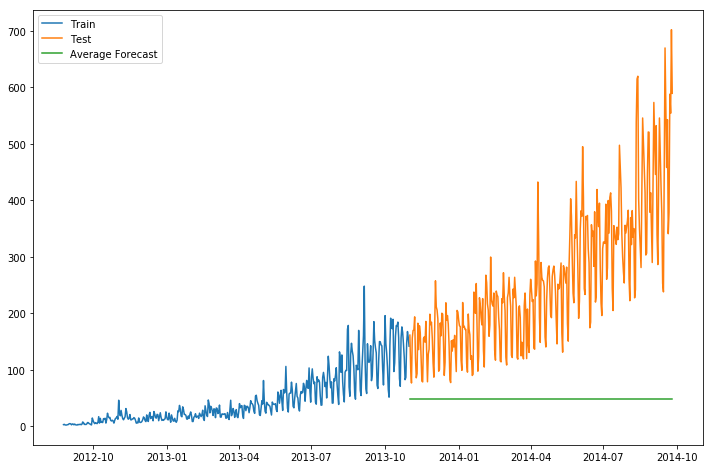

In [11]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Count'].mean()
plt.figure(figsize=(12,8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()


In [12]:
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.avg_forecast))
print(rms)



242.49704881


In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Count'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()